Algorithm 1 Perceptron learning algorithm for linearly seperable datasets
Input: Data features (X), labels (y), randomly intialised weights (w), learning rate (η)
Output: Updated weights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
from random import choice
from numpy import array, dot, random
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

A perceptron is a model of a biological neuron in an artificial neural network. The perceptron algorithm was designed to classify visual inputs, categorizing subjects into one of two types and separating groups with a line. Classification is an important part of machine learning and image processing.

In [52]:
class Perceptron(object):
    
    def __init__(self, no_of_inputs, Iterations=100, Learn_Rate=0.01): 
        self.Iterations = Iterations
        self.Learn_Rate = Learn_Rate
        self.weights = np.random.rand(no_of_inputs + 1)
    
    def train(self, x, y):
        inp=[]
        for _ in range(self.Iterations): 
            for inputs, label in zip(x, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.Learn_Rate * (label - prediction) * inputs
                self.weights[0] += self.Learn_Rate * (label - prediction)
            inp.append([self.weights[0],self.weights[1],self.weights[2]])
        return inp
    
    def predict(self, inputs): 
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0: 
          act = 1
        else:
          act = 0            
        return act
    
#     def __init__(self, Learn_Rate=0.5, Iterations=10):
#         self.learn_rate = Learn_Rate
#         self.Iterations = Iterations
#         self.errors = []
#         self.weights = np.zeros(1 + x.shape[1])
        
# #     # Defining fit method for model training.
#     def fit(self, x, y):
#         self.weights = np.zeros(1 + x.shape[1])
#         for i in range(self.Iterations):
#             error = 0
#             for xi, target in zip(x, y):
#                 update = self.learn_rate * (target - self.predict(xi))
#                 self.weights[1:] += update*xi
#                 self.weights[0] += update
#                 error += int(update != 0)
#             self.errors.append(error)
#         return self
    
#     # Net Input method for summing the given matrix inputs and their corresponding weights.
#     def net_input(self, x):
#         return np.dot(x, self.weights[1:]) + self.weights[0]
    
#     # Predict method for predicting the classification of data inputs.
#     def predict(self, x):
#         return np.where(self.net_input(x) >= 0.5, 1, 0)

In [2]:
# class Perceptron(object):
#     """Implements a perceptron network"""
#     def __init__(self, input_size, lr=1, epochs=100):
#         self.W = np.zeros(input_size+1)
#         # add one for bias
#         self.epochs = epochs
#         self.lr = lr
    
#     def activation_fn(self, x):
#         #return (x >= 0).astype(np.float32)
#         return 1 if x >= 0 else 0
 
#     def predict(self, x):
#         z = self.W.T.dot(x)
#         a = self.activation_fn(z)
#         return a
 
#     def fit(self, X, d):
#         for _ in range(self.epochs):
#             for i in range(d.shape[0]):
#                 x = np.insert(X[i], 0, 1)
#                 y = self.predict(x)
#                 e = d[i] - y
#                 self.W = self.W + self.lr * e * x

In [53]:
# d = {'col1': [0,0,1,1], 'col2': [0,1,0,1]}
# org = pd.DataFrame(data=d)
yor = np.array([1,1, 1, 0])

In [54]:
# x = org.iloc[0:4].values
# x = np.array([0,0],[1,0],[0,1],[1,1])
x= [(array([1,1])),
    (array([0,1])),
    (array([1,0])),
    (array([0,0]))]

In [55]:
x

[array([1, 1]), array([0, 1]), array([1, 0]), array([0, 0])]

In [56]:
Classifier = Perceptron(2,Learn_Rate=0.001, Iterations=1000)
a=Classifier.train(x, yor)

Printing the Weights

In [57]:
a

[[0.6872610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6862610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6852610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6842610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6832610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6822610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6812610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6802610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6792610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6782610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6772610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6762610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6752610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6742610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6732610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6722610272068603, 0.665349460758806, 0.6139996462826682],
 [0.6712

In [58]:
for i in range(len(x)):
    print(x[i],yor[i],Classifier.predict(x[i])) 

[1 1] 1 1
[0 1] 1 1
[1 0] 1 1
[0 0] 0 0


My accuracy for the OR gate

In [59]:
def ext(ax,x,y,**args):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_ext = np.linspace(xlim[0],xlim[1],10)
    
    
    xx = np.polyfit(x,y,deg=1)
    y_ext = np.poly1d(xx)(x_ext)
    ax.plot(x_ext,y_ext, **args)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax

In [60]:
def cod(ab):
    b,w1,w2 = ab
    
    ab = -b/w1
    y=-b/w2
    ac=y
    c=-y/ab
    
    x_cod = np.array([0,ab])
    y_cod = c * x_cod + ac
    return x_cod, y_cod

<function matplotlib.pyplot.show(close=None, block=None)>

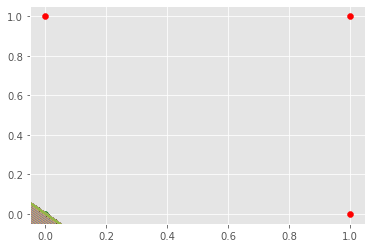

In [61]:
ax = plt.subplot(111)
ax.scatter(0, 0, color="g")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="r")
for i in range(len(a)):
    x_short,y_short =cod(a[i])
    ax = ext(ax, x_short, y_short, lw=2)
x_short,y_short =cod(a[99])
ax = ext(ax, x_short, y_short, lw=4)
# ax.legend()
plt.show

Decision Lines for the OR gate

In [62]:
yand = np.array([1,0, 0, 0])

In [63]:
Classifier = Perceptron(2,Learn_Rate=0.01, Iterations=1000)
aand=Classifier.train(x, yand)

In [64]:
for i in range(len(x)):
    print(x[i],yand[i],Classifier.predict(x[i])) 

[1 1] 1 1
[0 1] 0 0
[1 0] 0 0
[0 0] 0 0


<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


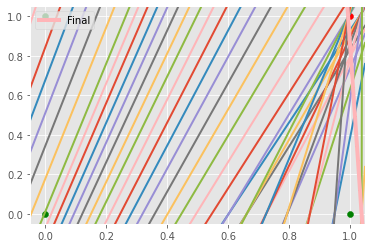

In [65]:
ax = plt.subplot(111)
ax.scatter(0, 0, color="g")
ax.scatter(0, 1, color="g")
ax.scatter(1, 0, color="g")
ax.scatter(1, 1, color="r")
for i in range(len(aand)):
    x_short,y_short =cod(aand[i])
    ax = ext(ax, x_short, y_short, lw=2)
x_short,y_short =cod(aand[99])
ax = ext(ax, x_short, y_short, lw=4,label="Final")
ax.legend()
plt.show

Decision Lines for the AND gate

Task 3: Apply the perceptron learning rule to a real dataset

In [22]:
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    return data
data = load_data()

From the above lines I am trying to fetch the IRIS dataset

In [23]:
data[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can see that there are three different classes in the dataset

In [24]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data = data.rename(columns={ data.columns[0]: "SepalLengthCm",data.columns[1]: "SepalWidthCm",data.columns[2]: "PetalLengthCm",data.columns[3]: "PetalWidthCm",data.columns[4]: "Species" })

I have tried to rename the column names with some respective names.

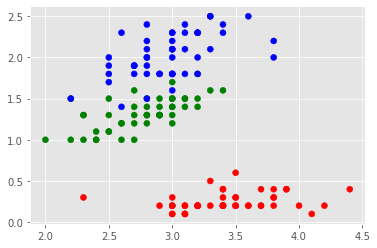

In [26]:
colors = data['Species'].replace(to_replace=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], value=['red', 'blue', 'green'])
plt.scatter(data['SepalWidthCm'], data['PetalWidthCm'], c=colors)

From the above plot we can see that two of the classes are not been Linear separability.

In [27]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
df2 = data.drop(['SepalLengthCm', 'PetalLengthCm'], axis=1)
df2['Species'].replace(to_replace=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], value=[0, 1, 1], inplace=True)
df2.head()

,SepalWidthCm,PetalWidthCm,Species
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0


In [29]:
s = df2['SepalWidthCm'].values
p = df2['PetalWidthCm'].values

I have tried to eliminate some of the columns and replace the values for the Soecies column. This would be helping me two have only two classes in the dataset and helping the perceptron to classify the classes.

In [30]:
colors = data['Species'].replace(to_replace=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], value=['red', 'green', 'green'])

In [31]:
y = df2['Species'].values

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
X = df2[['SepalWidthCm', 'PetalWidthCm']].values

In [34]:

inputs=[]
# sepal_length = np.empty(150, dtype=object)#empty array
# sepal_width = np.empty(150, dtype=object)
for i in range(len(X)): # converting the 2 dimensional array to 1-d
    inputs.append(X[i])
labels = y

In [39]:
inputs

[array([3.5, 0.2]),
 array([3. , 0.2]),
 array([3.2, 0.2]),
 array([3.1, 0.2]),
 array([3.6, 0.2]),
 array([3.9, 0.4]),
 array([3.4, 0.3]),
 array([3.4, 0.2]),
 array([2.9, 0.2]),
 array([3.1, 0.1]),
 array([3.7, 0.2]),
 array([3.4, 0.2]),
 array([3. , 0.1]),
 array([3. , 0.1]),
 array([4. , 0.2]),
 array([4.4, 0.4]),
 array([3.9, 0.4]),
 array([3.5, 0.3]),
 array([3.8, 0.3]),
 array([3.8, 0.3]),
 array([3.4, 0.2]),
 array([3.7, 0.4]),
 array([3.6, 0.2]),
 array([3.3, 0.5]),
 array([3.4, 0.2]),
 array([3. , 0.2]),
 array([3.4, 0.4]),
 array([3.5, 0.2]),
 array([3.4, 0.2]),
 array([3.2, 0.2]),
 array([3.1, 0.2]),
 array([3.4, 0.4]),
 array([4.1, 0.1]),
 array([4.2, 0.2]),
 array([3.1, 0.1]),
 array([3.2, 0.2]),
 array([3.5, 0.2]),
 array([3.1, 0.1]),
 array([3. , 0.2]),
 array([3.4, 0.2]),
 array([3.5, 0.3]),
 array([2.3, 0.3]),
 array([3.2, 0.2]),
 array([3.5, 0.6]),
 array([3.8, 0.4]),
 array([3. , 0.3]),
 array([3.8, 0.2]),
 array([3.2, 0.2]),
 array([3.7, 0.2]),
 array([3.3, 0.2]),


In [47]:
Classifier = Perceptron(2,Learn_Rate=0.001, Iterations=1000)
ir=Classifier.train(inputs, labels)

In [48]:
for i in range(len(inputs)):
    print(inputs[i],labels[i],Classifier.predict(inputs[i])) 

[3.5 0.2] 0 0
[3.  0.2] 0 0
[3.2 0.2] 0 0
[3.1 0.2] 0 0
[3.6 0.2] 0 0
[3.9 0.4] 0 0
[3.4 0.3] 0 0
[3.4 0.2] 0 0
[2.9 0.2] 0 0
[3.1 0.1] 0 0
[3.7 0.2] 0 0
[3.4 0.2] 0 0
[3.  0.1] 0 0
[3.  0.1] 0 0
[4.  0.2] 0 0
[4.4 0.4] 0 0
[3.9 0.4] 0 0
[3.5 0.3] 0 0
[3.8 0.3] 0 0
[3.8 0.3] 0 0
[3.4 0.2] 0 0
[3.7 0.4] 0 0
[3.6 0.2] 0 0
[3.3 0.5] 0 0
[3.4 0.2] 0 0
[3.  0.2] 0 0
[3.4 0.4] 0 0
[3.5 0.2] 0 0
[3.4 0.2] 0 0
[3.2 0.2] 0 0
[3.1 0.2] 0 0
[3.4 0.4] 0 0
[4.1 0.1] 0 0
[4.2 0.2] 0 0
[3.1 0.1] 0 0
[3.2 0.2] 0 0
[3.5 0.2] 0 0
[3.1 0.1] 0 0
[3.  0.2] 0 0
[3.4 0.2] 0 0
[3.5 0.3] 0 0
[2.3 0.3] 0 0
[3.2 0.2] 0 0
[3.5 0.6] 0 0
[3.8 0.4] 0 0
[3.  0.3] 0 0
[3.8 0.2] 0 0
[3.2 0.2] 0 0
[3.7 0.2] 0 0
[3.3 0.2] 0 0
[3.2 1.4] 1 1
[3.2 1.5] 1 1
[3.1 1.5] 1 1
[2.3 1.3] 1 1
[2.8 1.5] 1 1
[2.8 1.3] 1 1
[3.3 1.6] 1 1
[2.4 1. ] 1 1
[2.9 1.3] 1 1
[2.7 1.4] 1 1
[2. 1.] 1 1
[3.  1.5] 1 1
[2.2 1. ] 1 1
[2.9 1.4] 1 1
[2.9 1.3] 1 1
[3.1 1.4] 1 1
[3.  1.5] 1 1
[2.7 1. ] 1 1
[2.2 1.5] 1 1
[2.5 1.1] 1 1
[3.2 1.8] 1 1
[2.8 1.3

<function matplotlib.pyplot.show(close=None, block=None)>

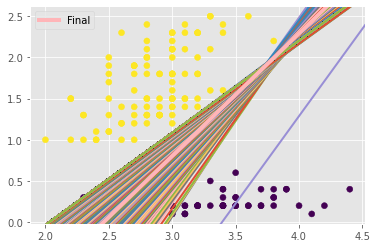

In [51]:
ax = plt.subplot(111)
ax.scatter(s, p, c =y)
for i in range(len(aand)):
    x_short,y_short =cod(ir[i])
    ax = ext(ax, x_short, y_short, lw=2)
x_short,y_short =cod(ir[99])
ax = ext(ax, x_short, y_short, lw=4,label="Final")
ax.legend()
plt.show

From the above plot we can see the decision lines after each epoch.